## Observations and Insights

## Dependencies and starter code

In [175]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata = "data/Mouse_metadata.csv"
study_results = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
merged_df = pd.merge(mouse_metadata, study_results, how='inner', on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


## Summary statistics

In [176]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_group = merged_df.groupby("Drug Regimen")['Tumor Volume (mm3)']
drug_group_mean = drug_group.mean()
drug_group_median = drug_group.median()
drug_group_var = drug_group.var()
drug_group_std = drug_group.std()
drug_group_sem = drug_group.sem()

In [177]:
drug_df = pd.DataFrame(pd.concat({'Mean': drug_group_mean, 'Median': drug_group_median, 'Variance': drug_group_var, 'STD': drug_group_std, 'SEM': drug_group_sem}, axis=1))
drug_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar plots

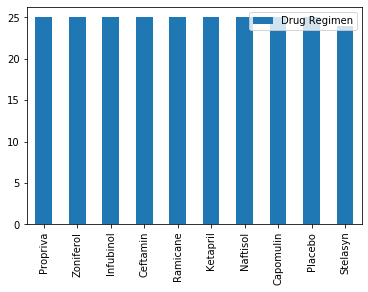

In [178]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas
no_dup_df = merged_df.drop_duplicates('Mouse ID', keep='first')
data_points = pd.DataFrame(no_dup_df['Drug Regimen'].value_counts())
data_points.plot.bar()

<BarContainer object of 10 artists>

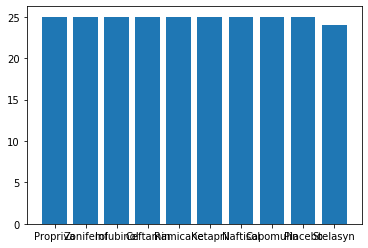

In [179]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot
plt.bar(data_points.index, data_points['Drug Regimen'])

## Pie plots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000020E27D1FF88>],
      dtype=object)

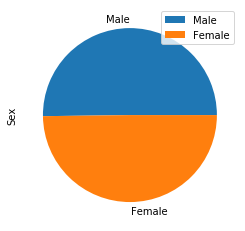

In [180]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(no_dup_df['Sex'].value_counts())
gender_df.plot.pie(subplots=True)

([<matplotlib.patches.Wedge at 0x20e27d9be08>,
 [Text(-0.0069391759767656585, 1.0999781124353174, 'Male'),
  Text(0.006939175976765524, -1.0999781124353174, 'Female')])

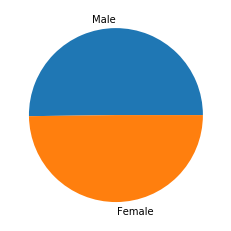

In [181]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(gender_df, labels=gender_df.index)

## Quartiles, outliers and boxplots

In [182]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers.
most_promising_drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ramicane']
final_vol_df = merged_df.sort_values('Timepoint').groupby('Drug Regimen')['Drug Regimen', 'Tumor Volume (mm3)'].tail(1)
final_vol_df.query("`Drug Regimen` == @most_promising_drugs", inplace=True)
final_vol_df.sort_values('Drug Regimen', inplace=True)
final_vol_df

,Drug Regimen,Tumor Volume (mm3)
204,Capomulin,37.311846
1773,Ceftamin,64.634949
637,Infubinol,72.226731
174,Ramicane,32.978522


In [183]:
#Capomulin
capomulin_df = merged_df.query("`Drug Regimen` == 'Capomulin'")

quartiles = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Capomulin is: {lowerq}")
print(f"The upper quartile of Capomulin is: {upperq}")
print(f"The interquartile range of Capomulin is: {iqr}")
print(f"The the median of Capomulin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

capomulin_outlier_df = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < lower_bound) | (capomulin_df['Tumor Volume (mm3)'] > upper_bound)]
capomulin_outlier_df

The lower quartile of Capomulin is: 37.685932865
The upper quartile of Capomulin is: 45.0
The interquartile range of Capomulin is: 7.314067135000002
The the median of Capomulin is: 41.557808879999996 
Values below 26.714832162499995 could be outliers.
Values above 55.9711007025 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [184]:
#Ceftamin
ceftamin_df = merged_df.query("`Drug Regimen` == 'Ceftamin'")

quartiles = ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ceftamin is: {lowerq}")
print(f"The upper quartile of Ceftamin is: {upperq}")
print(f"The interquartile range of Ceftamin is: {iqr}")
print(f"The the median of Ceftamin is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

ceftamin_outlier_df = ceftamin_df.loc[(ceftamin_df['Tumor Volume (mm3)'] < lower_bound) | (ceftamin_df['Tumor Volume (mm3)'] > upper_bound)]
ceftamin_outlier_df

The lower quartile of Ceftamin is: 47.208427112500004
The upper quartile of Ceftamin is: 56.801437570000004
The interquartile range of Ceftamin is: 9.5930104575
The the median of Ceftamin is: 51.77615728000001 
Values below 32.818911426250004 could be outliers.
Values above 71.19095325625 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [185]:
#Infubinol
infubinol_df = merged_df.query("`Drug Regimen` == 'Infubinol'")

quartiles = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Infubinol is: {lowerq}")
print(f"The upper quartile of Infubinol is: {upperq}")
print(f"The interquartile range of Infubinol is: {iqr}")
print(f"The the median of Infubinol is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

infubinol_outlier_df = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < lower_bound) | (infubinol_df['Tumor Volume (mm3)'] > upper_bound)]
infubinol_outlier_df

The lower quartile of Infubinol is: 47.3123533
The upper quartile of Infubinol is: 57.314443967500004
The interquartile range of Infubinol is: 10.002090667500006
The the median of Infubinol is: 51.82058438 
Values below 32.309217298749985 could be outliers.
Values above 72.31757996875001 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites


In [186]:
#Ramicane
ramicane_df = merged_df.query("`Drug Regimen` == 'Ramicane'")

quartiles = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of Ramicane is: {lowerq}")
print(f"The upper quartile of Ramicane is: {upperq}")
print(f"The interquartile range of Ramicane is: {iqr}")
print(f"The the median of Ramicane is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

ramicane_outlier_df = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < lower_bound) | (ramicane_df['Tumor Volume (mm3)'] > upper_bound)]
ramicane_outlier_df

The lower quartile of Ramicane is: 36.67463458499999
The upper quartile of Ramicane is: 45.0
The interquartile range of Ramicane is: 8.325365415000007
The the median of Ramicane is: 40.67323554 
Values below 24.18658646249998 could be outliers.
Values above 57.48804812250001 could be outliers.


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1


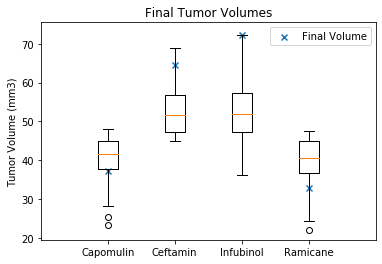

In [191]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig, ax = plt.subplots()

ax.set_title('Final Tumor Volumes')
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xticklabels(most_promising_drugs)

ax.boxplot(capomulin_df['Tumor Volume (mm3)'])
ax.boxplot(ceftamin_df['Tumor Volume (mm3)'], positions=[1.5])
ax.boxplot(infubinol_df['Tumor Volume (mm3)'], positions=[2])
ax.boxplot(ramicane_df['Tumor Volume (mm3)'], positions=[2.5])

ax.scatter([1, 1.5, 2, 2.5], final_vol_df['Tumor Volume (mm3)'], marker='x', label='Final Volume')
plt.legend(loc='best')

plt.show()

## Line and scatter plots

In [188]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

In [189]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

In [190]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen